In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

In [2]:
missing_val = '?'

In [3]:
# Reading data from csv file
ds = pd.read_csv('Insurance_Claim.csv', na_values=missing_val)
ds

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [4]:
# Checking the initial shape of the dataset as how many rows and columns are present in it
ds.shape

(9134, 26)

In [5]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (9134, 26)
Shape of dataset after removing duplicates:  (9134, 26)


In [6]:
# Checking the columns of the dataset as on which features, 'Insurance_Claim' is dependent
ds.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
# Checking the datatypes of the columns
ds.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [8]:
# Checking the columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [9]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
ds_int.columns

Index(['Claim Amount', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [10]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# Statistical Summary

In [11]:
ds.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Key Observation

There is sometimes mean is greater than median and sometimes median is greater than mean

EDA: Exploratory Data Analysis Exploring Data Variable

Target/Dependent variable is continues in nature

In [12]:
# Checking for null values
ds.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [13]:
ds.isna().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

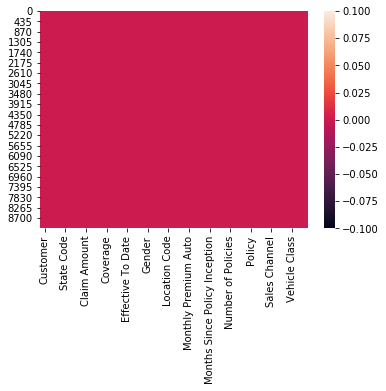

In [14]:
# Checking null values through heatmap visualization

sns.heatmap(ds.isnull())

# Checking the corelation

In [15]:
# Checking teh corelation
ds.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


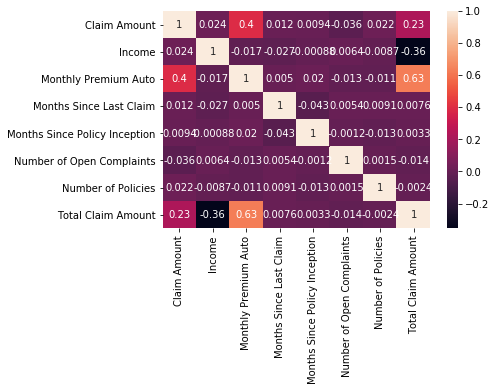

In [16]:
# checking the co relation through heatmap visualization
sns.heatmap(ds.corr(), annot=True)

Above heatmap shows the corelation between the different features of dataset

# Plotting outliers

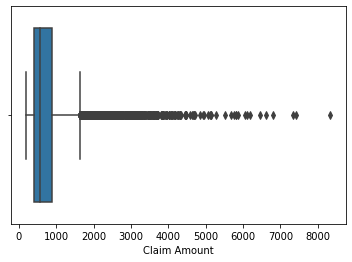

In [17]:
sns.boxplot(ds['Claim Amount'])

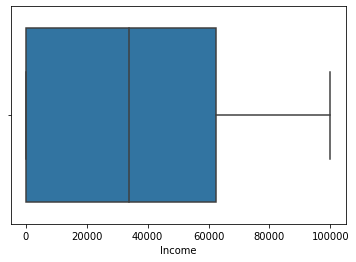

In [18]:
sns.boxplot(ds['Income'])

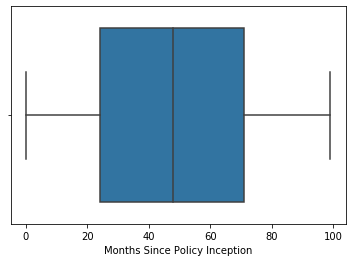

In [19]:
sns.boxplot(ds['Months Since Policy Inception'])

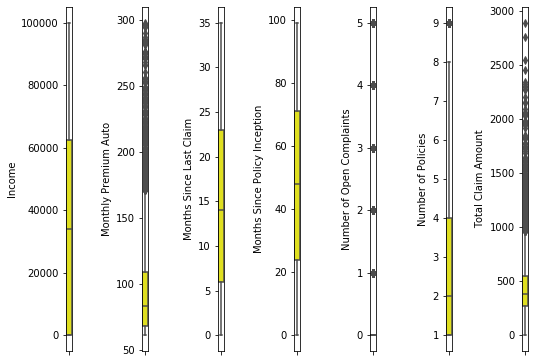

In [20]:
collist = ds_int.columns.values
nrows = 12
ncols = 12

plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

Ouliers are present in the dataset

# Histograms

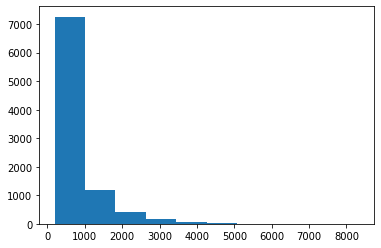

In [21]:
plt.hist(ds['Claim Amount'])
plt.show()

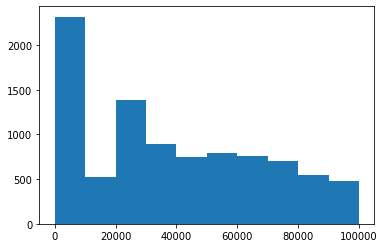

In [22]:
plt.hist(ds['Income'])
plt.show()

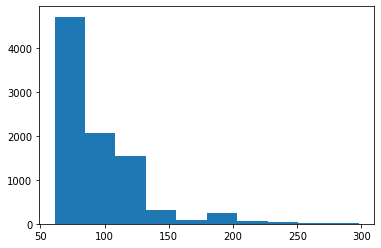

In [23]:
plt.hist(ds['Monthly Premium Auto'])
plt.show()

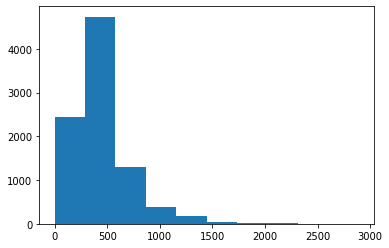

In [24]:
plt.hist(ds['Total Claim Amount'])
plt.show()

# Violinplot

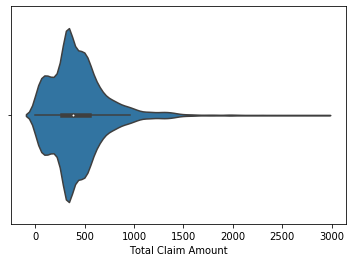

In [25]:
sns.violinplot(ds['Total Claim Amount'])

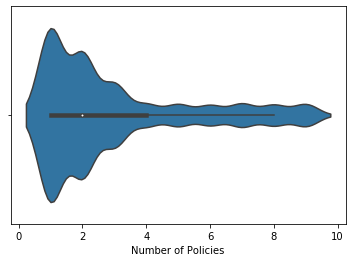

In [26]:
sns.violinplot(ds['Number of Policies'])

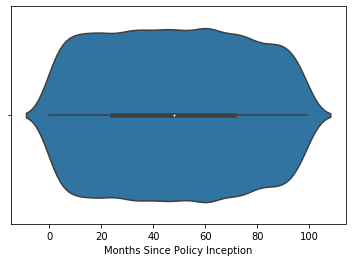

In [27]:
sns.violinplot(ds['Months Since Policy Inception'])

# Distribution plots to check the skewness of data

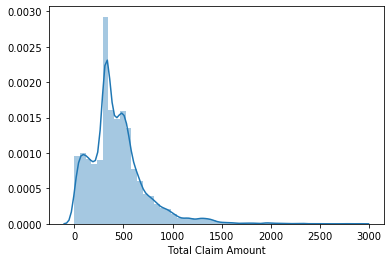

In [28]:
sns.distplot(ds['Total Claim Amount'])

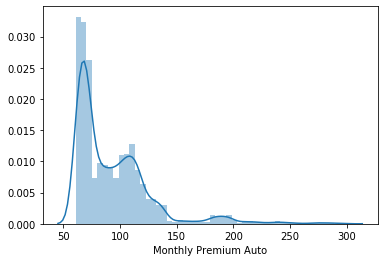

In [29]:
sns.distplot(ds['Monthly Premium Auto'])

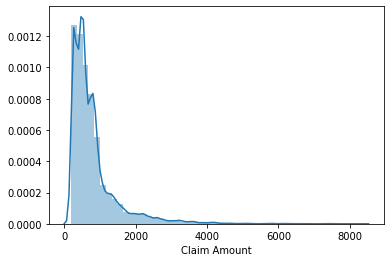

In [30]:
sns.distplot(ds['Claim Amount'])

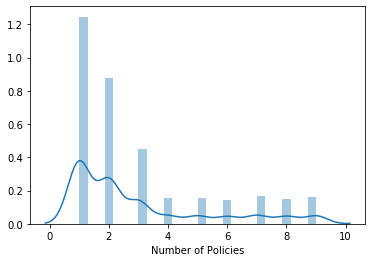

In [31]:
sns.distplot(ds['Number of Policies'])

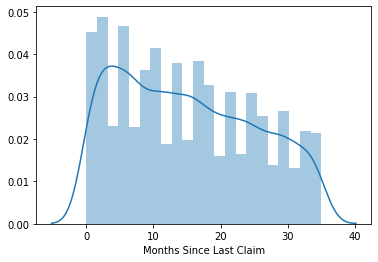

In [32]:
sns.distplot(ds['Months Since Last Claim'])

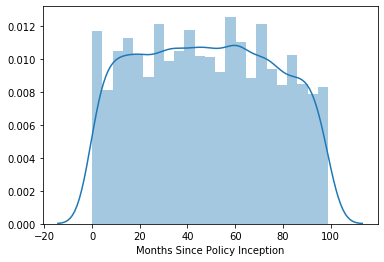

In [33]:
sns.distplot(ds['Months Since Policy Inception'])

Data is not normally distributed, data is skewed

# Bivariate Analysis

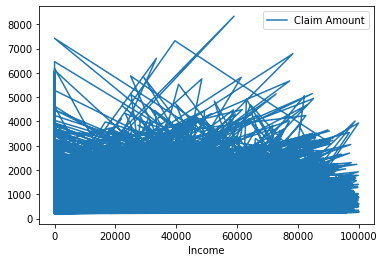

In [34]:
ds.plot(x='Income', y='Claim Amount', kind = 'line')
plt.show()

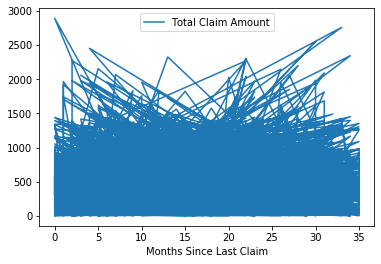

In [35]:
ds.plot(x='Months Since Last Claim', y='Total Claim Amount', kind = 'line')
plt.show()

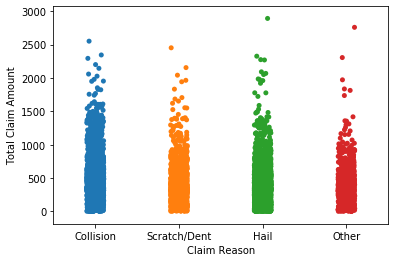

In [36]:
sns.stripplot(x='Claim Reason', y='Total Claim Amount', data=ds)

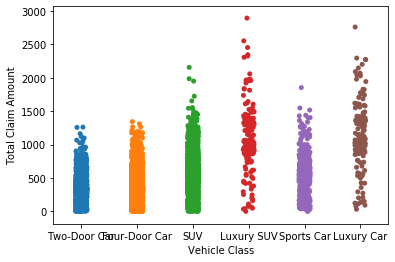

In [37]:
sns.stripplot(x='Vehicle Class', y='Total Claim Amount', data=ds)

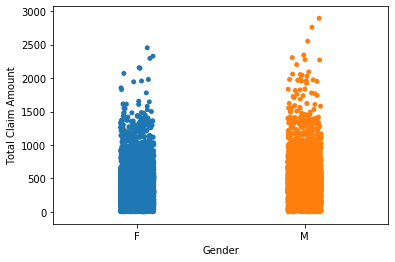

In [38]:
sns.stripplot(x='Gender', y='Total Claim Amount', data=ds)

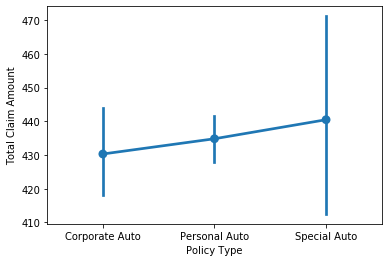

In [39]:
sns.pointplot(x='Policy Type', y='Total Claim Amount', data=ds)

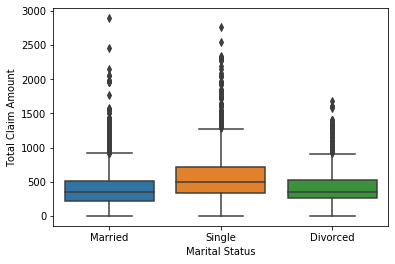

In [40]:
sns.boxplot(x='Marital Status', y='Total Claim Amount', data=ds)

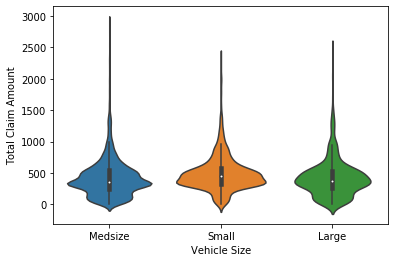

In [41]:
sns.violinplot(x='Vehicle Size', y='Total Claim Amount', data=ds)

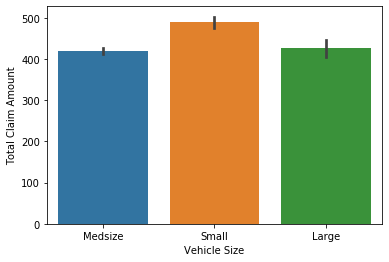

In [42]:
sns.barplot(x='Vehicle Size', y='Total Claim Amount', data=ds)

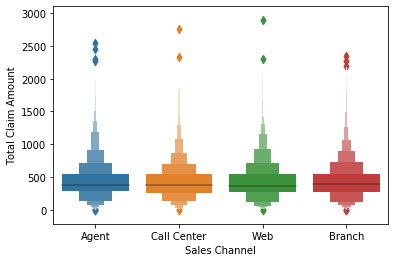

In [43]:
sns.boxenplot(x='Sales Channel', y='Total Claim Amount', data=ds)

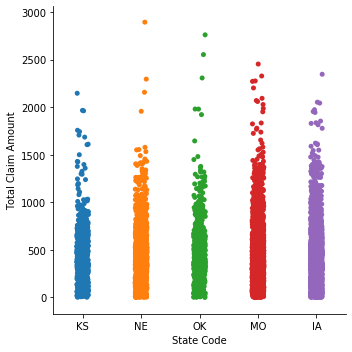

In [44]:
sns.catplot(x='State Code', y='Total Claim Amount' ,data=ds)

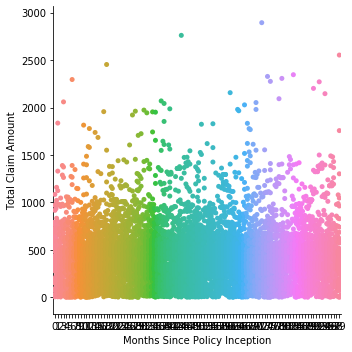

In [45]:
sns.catplot(x='Months Since Policy Inception', y='Total Claim Amount' , data=ds, kind='swarm')

In [46]:
# using LabelEncoder to change categorical data to number data

le = LabelEncoder()

for i in ds_cat:
    ds[i] = le.fit_transform(ds[i])

In [47]:
ds.dtypes

Customer                           int32
Country                            int32
State Code                         int32
State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                  int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class   

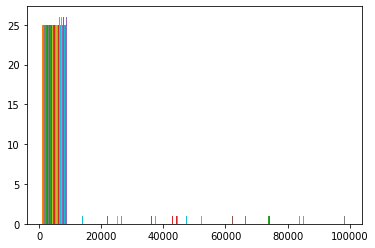

In [48]:
plt.hist(ds)
plt.show()

# Removing outliers 

In [49]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore

for i in ds.columns:
    ds_copy = ds.drop(i, axis=1 )
    z = np.abs(zscore(ds_copy))
    ds_new = ds_copy [(z<3).all(axis=1)]
    print (ds_new.shape, i)

(0, 25) Customer
(8470, 25) Country
(0, 25) State Code
(0, 25) State
(0, 25) Claim Amount
(0, 25) Response
(0, 25) Coverage
(0, 25) Education
(0, 25) Effective To Date
(0, 25) EmploymentStatus
(0, 25) Gender
(0, 25) Income
(0, 25) Location Code
(0, 25) Marital Status
(0, 25) Monthly Premium Auto
(0, 25) Months Since Last Claim
(0, 25) Months Since Policy Inception
(0, 25) Number of Open Complaints
(0, 25) Number of Policies
(0, 25) Policy Type
(0, 25) Policy
(0, 25) Claim Reason
(0, 25) Sales Channel
(0, 25) Total Claim Amount
(0, 25) Vehicle Class
(0, 25) Vehicle Size


Country column should be removed, as its impacting the dataset

In [50]:
ds.drop(columns=['Country'], inplace=True)

In [51]:
ds.columns

Index(['Customer', 'State Code', 'State', 'Claim Amount', 'Response',
       'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [52]:
# Checking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (9134, 25)
After removing zscore:  (8470, 25)


In [53]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Total Claim Amount'])
y = ds_final['Total Claim Amount']

In [54]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [55]:
(x.shape, y.shape)

((8470, 24), (8470,))

In [56]:
x.skew()

Customer                        -0.003693
State Code                       0.019194
State                            0.019194
Claim Amount                     1.848796
Response                         2.030625
Coverage                         1.080580
Education                        0.337866
Effective To Date                0.031848
EmploymentStatus                 0.844023
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             1.330466
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.574570
Number of Policies               1.226531
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.725402
Sales Channel                    0.503296
Vehicle Class                    0.403978
Vehicle Size                     0

In [57]:
# Removing skewness of data

for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.sqrt(x[col])

In [58]:
x.skew()

Customer                        -0.003693
State Code                       0.019194
State                            0.019194
Claim Amount                     0.702508
Response                         0.000000
Coverage                         1.347128
Education                        0.337866
Effective To Date                0.031848
EmploymentStatus                -1.700069
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             0.503999
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        0.762906
Number of Policies              -0.180070
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                    -0.342853
Sales Channel                    0.503296
Vehicle Class                    0.403978
Vehicle Size                     0

In [59]:
# Removing skewness of data
for i in range(1,5):
    for col in x.columns:
        if x.skew().loc[col] > 0.55:
            x[col] = np.sqrt(x[col])

In [60]:
x.skew()

Customer                        -0.003693
State Code                       0.019194
State                            0.019194
Claim Amount                     0.152758
Response                         0.000000
Coverage                         1.347128
Education                        0.337866
Effective To Date                0.031848
EmploymentStatus                -1.700069
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             0.503999
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        0.648378
Number of Policies              -0.180070
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                    -0.342853
Sales Channel                    0.503296
Vehicle Class                    0.403978
Vehicle Size                     0

In [61]:
x.replace(np.NaN, 0, inplace=True)

In [62]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train,aa y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [63]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x, y)


Max r2 score corresponding to  79  is:  0.5553374962270923


In [64]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1, 42)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x, y)
gknr.best_params_

{'n_neighbors': 9}

In [65]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors =9)
r_state = max_r2_score(knr, x, y)


Max r2 score corresponding to  64  is:  0.6280328048394429


In [66]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  0.5196372621993695
Standard deviation for r2 score in linear regression:  0.010971755172432264

*****************

Mean r2 score for KNN regression:  0.6006421431472957
Standard deviation for r2 score in KNN regression:  0.016170793908083694


In [67]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x, y)
clf.best_params_

{'alpha': 0.1}

In [68]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=0.0001)
r_state = max_r2_score (lsreg, x, y)


Max r2 score corresponding to  79  is:  0.555337413137703


In [69]:
# Lets use cross_val_score with Lasso

print ('Mean r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').mean())
print ('Standard deviation in  r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Lasso Regression:  0.5196373337010021
Standard deviation in  r2 score for Lasso Regression:  0.010971719306718638


In [70]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100,150, 200, 250, 300]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [71]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 250)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  0.8172441499425759
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.007290493674185946


In [72]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x, y)


Max r2 score corresponding to  79  is:  0.8361840838620177


In [73]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 150, 200, 250, 300], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 300}

In [74]:
ada_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), learning_rate=1, n_estimators=300)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  0.8225941261201752
Standard Deviation in  r2 score for Ada Boosting Regression:  0.00982311819364409


In [75]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x, y)


Max r2 score corresponding to  81  is:  0.8428678228053753


In [76]:
# we tried all the models and till now and best model will be selected
# random state corresponding to highest r2 score is 81

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=81, test_size = 0.20)
ada_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), learning_rate=1, n_estimators=300)
ada_reg.fit(x_train, y_train)
y_pred =  ada_reg.predict(x_test)
print (y_pred)

[112.120881 460.8      694.598288 ... 484.87847  161.210468 806.4     ]


In [77]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_insurance_claim.csv')

In [78]:
# Lets find RMSE and r2 sciore using sklearn.metrics

print ("RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print ('r2 score is: ', r2_score(y_test, y_pred))

RMSE is:  95.97402932544297
r2 score is:  0.8433842066641476


In [79]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(ada_reg, 'Project_Insurance_Claim.pkl')
#clf = joblib.load('Project_Insurance_Claim.pkl')
#clf.predict(x_test)

array([112.120881, 460.8     , 694.598288, ..., 484.87847 , 161.210468,
       806.4     ])